In [9]:
INPUT_DIR = '/Users/adarsh/Documents/Adarsh/MAC/DataAnalysis/Project/Data_Set'
!ls {INPUT_DIR}

anime.csv               animelist.csv           rating_complete.csv
anime_with_synopsis.csv html                    watching_status.csv


In [10]:
import numpy as np
import pandas as pd

rating_df = pd.read_csv(INPUT_DIR + '/animelist.csv', 
                        low_memory=False, 
                        usecols=["user_id", "anime_id", "rating"]
                        #, nrows=90000000
                        )
rating_df.head(4)

,user_id,anime_id,rating
0,0,67,9
1,0,6702,7
2,0,242,10
3,0,4898,0


In [14]:
# User should rate atleast 400 animies
n_ratings = rating_df['user_id'].value_counts()
rating_df = rating_df[rating_df['user_id'].isin(n_ratings[n_ratings >= 400].index)].copy()
len(rating_df)

71418114

In [13]:
# Scaling BTW (0 , 1.0)
min_rating = min(rating_df['rating'])
max_rating = max(rating_df['rating'])
rating_df['rating'] = rating_df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values.astype(np.float64)

AvgRating = np.mean(rating_df['rating'])
print('Avg', AvgRating)

Avg 0.4245716641486016


In [15]:
# Removing Duplicated Rows
duplicates = rating_df.duplicated()

if duplicates.sum() > 0:
    print('> {} duplicates'.format(duplicates.sum()))
    rating_df = rating_df[~duplicates]

print('> {} duplicates'.format(rating_df.duplicated().sum()))

> 1 duplicates
> 0 duplicates


In [16]:
g = rating_df.groupby('user_id')['rating'].count()
top_users = g.dropna().sort_values(ascending=False)[:20]
top_r = rating_df.join(top_users, rsuffix='_r', how='inner', on='user_id')

g = rating_df.groupby('anime_id')['rating'].count()
top_animes = g.dropna().sort_values(ascending=False)[:20]
top_r = top_r.join(top_animes, rsuffix='_r', how='inner', on='anime_id')

pd.crosstab(top_r.user_id, top_r.anime_id, top_r.rating, aggfunc=np.sum)

/var/folders/2s/kn5l0m3n2xl3wvywld3n84480000gn/T/ipykernel_5770/1701153738.py:9: FutureWarning: The provided callable <function sum at 0x105a196c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pd.crosstab(top_r.user_id, top_r.anime_id, top_r.rating, aggfunc=np.sum)


anime_id,226,1535,1575,2001,2167,4224,5081,5114,6547,6746,9253,9989,10620,11757,15809,16498,19815,20507,22319,30276
user_id,,,,,,,,,,,,,,,,,,,,
20807,1.0,1.0,1.0,1.0,0.8,1.0,0.9,1.0,1.0,1.0,1.0,0.9,1.0,1.0,0.8,1.0,1.0,1.0,1.0,1.0
50485,0.0,0.6,1.0,1.0,0.9,1.0,1.0,1.0,1.0,0.9,1.0,0.9,0.6,1.0,1.0,0.9,1.0,1.0,1.0,0.8
63900,0.7,0.0,0.0,0.0,0.0,0.0,0.0,0.9,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.8,0.0,0.8,0.8,0.8
68042,0.8,1.0,0.9,1.0,0.7,0.9,1.0,0.9,0.7,0.8,0.9,0.8,0.4,0.4,0.6,0.9,0.3,0.2,0.5,0.9
85472,0.7,0.0,0.0,1.0,0.9,0.9,0.0,0.0,1.0,0.0,0.8,0.0,0.8,0.9,0.8,0.8,0.7,0.7,0.7,0.9
92529,0.9,0.9,1.0,1.0,0.0,0.8,0.0,0.9,0.9,0.0,1.0,0.0,0.8,0.9,0.8,0.9,0.9,0.8,0.8,1.0
122341,0.2,0.3,0.2,0.7,0.4,0.3,0.3,0.8,0.5,0.6,0.7,0.3,0.2,0.1,0.3,0.1,0.4,0.4,0.2,0.6
131988,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
140590,0.3,0.6,0.5,0.8,0.6,0.8,0.8,0.9,0.5,0.8,0.9,0.7,0.3,0.4,0.6,0.5,0.7,0.7,0.5,0.7


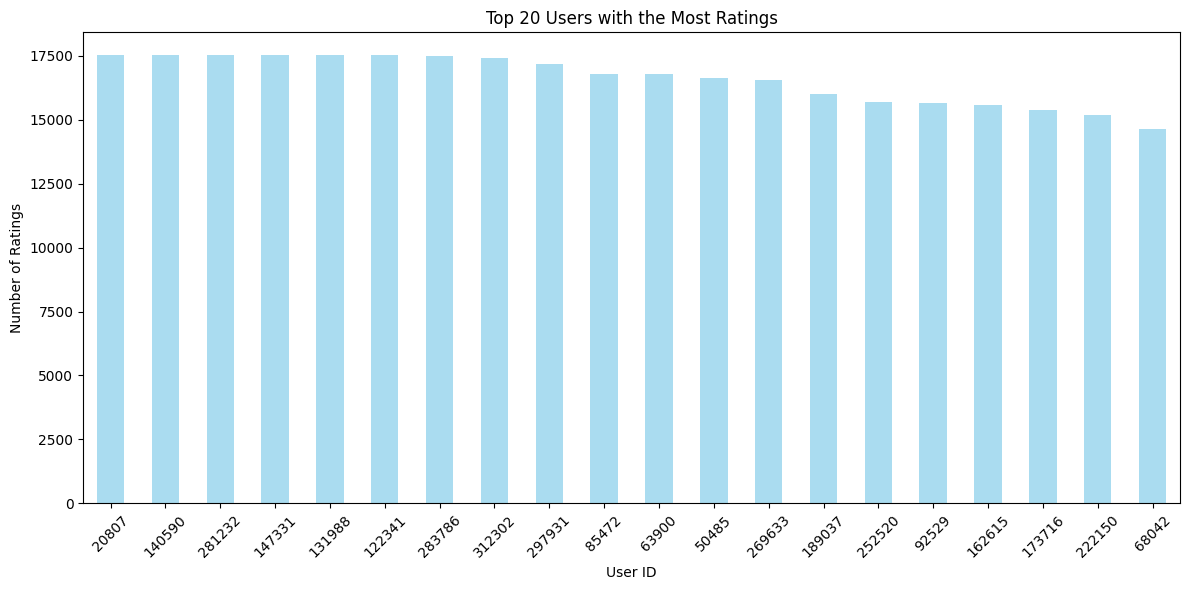

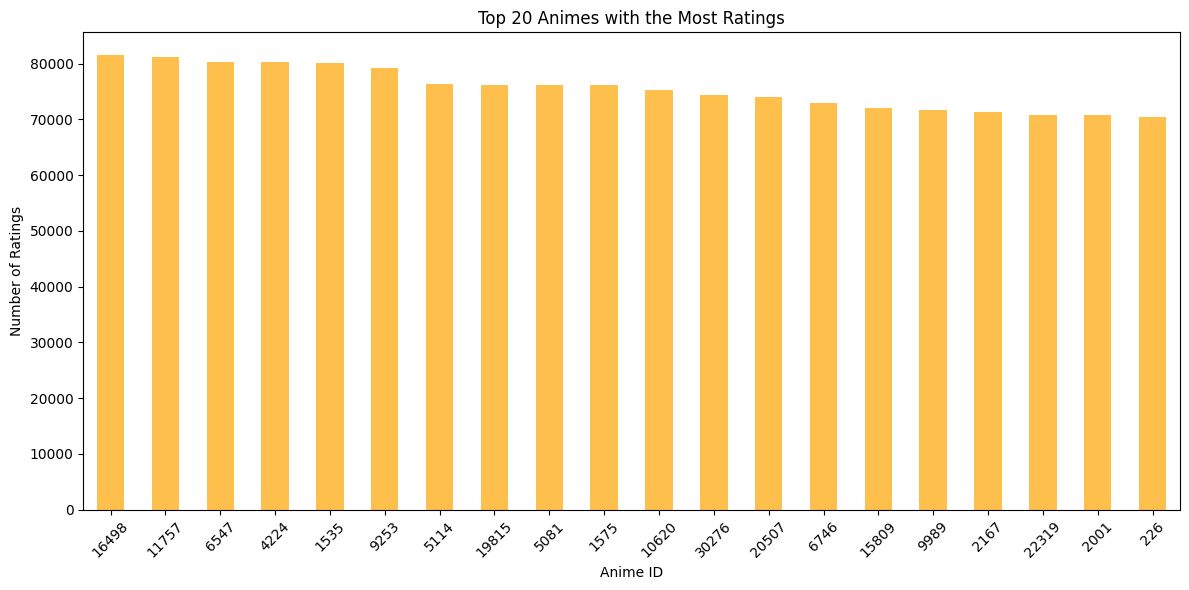

In [17]:
import matplotlib.pyplot as plt

# Bar chart for top 20 users with the most ratings
plt.figure(figsize=(12, 6))
top_users.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title("Top 20 Users with the Most Ratings")
plt.xlabel("User ID")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Bar chart for top 20 animes with the most ratings
plt.figure(figsize=(12, 6))
top_animes.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Top 20 Animes with the Most Ratings")
plt.xlabel("Anime ID")
plt.ylabel("Number of Ratings")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/var/folders/2s/kn5l0m3n2xl3wvywld3n84480000gn/T/ipykernel_5770/3581217492.py:5: FutureWarning: The provided callable <function sum at 0x105a196c0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  interaction_matrix = pd.crosstab(top_r.user_id, top_r.anime_id, top_r.rating, aggfunc=np.sum).fillna(0)


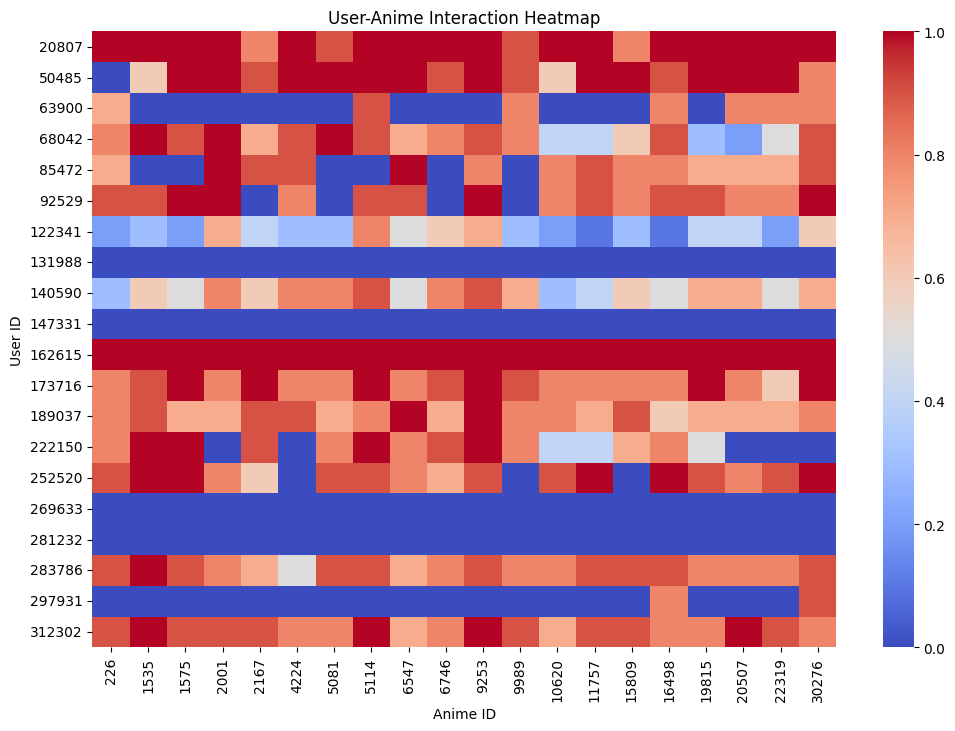

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a crosstab of top users and top animes
interaction_matrix = pd.crosstab(top_r.user_id, top_r.anime_id, top_r.rating, aggfunc=np.sum).fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(interaction_matrix, cmap="coolwarm", annot=False, cbar=True)
plt.title("User-Anime Interaction Heatmap")
plt.xlabel("Anime ID")
plt.ylabel("User ID")
plt.show()


## **Data Preprocessing**

In [20]:
# Encoding categorical data
user_ids = rating_df["user_id"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
user_encoded2user = {i: x for i, x in enumerate(user_ids)}
rating_df["user"] = rating_df["user_id"].map(user2user_encoded)
n_users = len(user2user_encoded)

anime_ids = rating_df["anime_id"].unique().tolist()
anime2anime_encoded = {x: i for i, x in enumerate(anime_ids)}
anime_encoded2anime = {i: x for i, x in enumerate(anime_ids)}
rating_df["anime"] = rating_df["anime_id"].map(anime2anime_encoded)
n_animes = len(anime2anime_encoded)

print("Num of users: {}, Num of animes: {}".format(n_users, n_animes))
print("Min rating: {}, Max rating: {}".format(min(rating_df['rating']), max(rating_df['rating'])))

Num of users: 91641, Num of animes: 17560
Min rating: 0.0, Max rating: 1.0


In [21]:
# Shuffle
rating_df = rating_df.sample(frac=1, random_state=73)

X = rating_df[['user', 'anime']].values
y = rating_df["rating"]

In [22]:
# Split
test_set_size = 10000 #10k for test set
train_indices = rating_df.shape[0] - test_set_size 

X_train, X_test, y_train, y_test = (
    X[:train_indices],
    X[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

print('> Train set ratings: {}'.format(len(y_train)))
print('> Test set ratings: {}'.format(len(y_test)))

> Train set ratings: 71408113
> Test set ratings: 10000


In [23]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [24]:
# Accelerator check
import tensorflow as tf    
print(tf.__version__)

2.16.2


In [25]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [26]:
# Embedding layers
from tensorflow.keras.layers import Add, Activation, Lambda, BatchNormalization, Concatenate, Dropout, Input, Embedding, Dot, Reshape, Dense, Flatten

def RecommenderNet():
    embedding_size = 128
    
    user = Input(name = 'user', shape = [1])
    user_embedding = Embedding(name = 'user_embedding',
                       input_dim = n_users, 
                       output_dim = embedding_size)(user)
    
    anime = Input(name = 'anime', shape = [1])
    anime_embedding = Embedding(name = 'anime_embedding',
                       input_dim = n_animes, 
                       output_dim = embedding_size)(anime)
    
    #x = Concatenate()([user_embedding, anime_embedding])
    x = Dot(name = 'dot_product', normalize = True, axes = 2)([user_embedding, anime_embedding])
    x = Flatten()(x)
        
    x = Dense(1, kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = Activation("sigmoid")(x)
    
    model = Model(inputs=[user, anime], outputs=x)
    model.compile(loss='binary_crossentropy', metrics=["mae", "mse"], optimizer='Adam')
    
    return model

model = RecommenderNet()
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ user (InputLayer)   │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ anime (InputLayer)  │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ user_embedding      │ (None, 1, 128)    │ 11,730,048 │ user[0][0]        │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ anime_embedding     │ (None, 1, 128)    │  2,247,680 │ anime[0][0]       │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dot_product (Dot)   │ (None, 1, 1)      │          0 │ user_embedding[0… │
│                     │                   │            │ anime_embedding[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 1)         │          0 │ dot_product[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 1)         │          2 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 1)         │          4 │ dense[0][0]       │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, 1)         │          0 │ batch_normalizat… │
│ (Activation)        │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 13,977,734 (53.32 MB)

 Trainable params: 13,977,732 (53.32 MB)

 Non-trainable params: 2 (8.00 B)

In [27]:
# Callbacks
from tensorflow.keras.callbacks import Callback, ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping, ReduceLROnPlateau

start_lr = 0.00001
min_lr = 0.00001
max_lr = 0.00005
batch_size = 10000

rampup_epochs = 5
sustain_epochs = 0
exp_decay = .8

def lrfn(epoch):
    if epoch < rampup_epochs:
        return (max_lr - start_lr)/rampup_epochs * epoch + start_lr
    elif epoch < rampup_epochs + sustain_epochs:
        return max_lr
    else:
        return (max_lr - min_lr) * exp_decay**(epoch-rampup_epochs-sustain_epochs) + min_lr


lr_callback = LearningRateScheduler(lambda epoch: lrfn(epoch), verbose=0)

checkpoint_filepath = './.weights.h5'

model_checkpoints = ModelCheckpoint(filepath=checkpoint_filepath,
                                        save_weights_only=True,
                                        monitor='val_loss',
                                        mode='min',
                                        save_best_only=True)

early_stopping = EarlyStopping(patience = 3, monitor='val_loss', 
                               mode='min', restore_best_weights=True)

my_callbacks = [
    model_checkpoints,
    lr_callback,
    early_stopping,   
]

In [ ]:
# Model training
history = model.fit(
    x=X_train_array,
    y=y_train,
    batch_size=batch_size,
    epochs=20,
    verbose=1,
    validation_data=(X_test_array, y_test),
    callbacks=my_callbacks
)

model.load_weights(checkpoint_filepath)

## **Extracting weights from model**

In [37]:
def extract_weights(name, model):
    weight_layer = model.get_layer(name)
    weights = weight_layer.get_weights()[0]
    weights = weights / np.linalg.norm(weights, axis = 1).reshape((-1, 1))
    return weights

anime_weights = extract_weights('anime_embedding', model)
user_weights = extract_weights('user_embedding', model)

### **anime meta data**

In [38]:
df = pd.read_csv(INPUT_DIR + '/anime.csv', low_memory=True)
df = df.replace("Unknown", np.nan)

In [39]:
# Fixing Names
def getAnimeName(anime_id):
    try:
        name = df[df.anime_id == anime_id].eng_version.values[0]
        if name is np.nan:
            name = df[df.anime_id == anime_id].Name.values[0]
    except:
        print('error')
    
    return name

df['anime_id'] = df['MAL_ID']
df["eng_version"] = df['English name']
df['eng_version'] = df.anime_id.apply(lambda x: getAnimeName(x))

df.sort_values(by=['Score'], 
               inplace=True,
               ascending=False, 
               kind='quicksort',
               na_position='last')

df = df[["anime_id", "eng_version", 
         "Score", "Genres", "Episodes", 
         "Type", "Premiered", "Members"]]

In [40]:
def getAnimeFrame(anime):
    if isinstance(anime, int):
        return df[df.anime_id == anime]
    if isinstance(anime, str):
        return df[df.eng_version == anime]

### **sypnopsis data**

In [41]:
cols = ["MAL_ID", "Name", "Genres", "sypnopsis"]
sypnopsis_df = pd.read_csv(INPUT_DIR + '/anime_with_synopsis.csv', usecols=cols)

def getSypnopsis(anime):
    if isinstance(anime, int):
        return sypnopsis_df[sypnopsis_df.MAL_ID == anime].sypnopsis.values[0]
    if isinstance(anime, str):
        return sypnopsis_df[sypnopsis_df.Name == anime].sypnopsis.values[0]

## **Task 1**: Finding Similar Animes (Item Based Recommendation)

In [42]:
#pd.reset_option('all')
pd.set_option("max_colwidth", None)

def find_similar_animes(name, n=10, return_dist=False, neg=False):
    try:
        index = getAnimeFrame(name).anime_id.values[0]
        encoded_index = anime2anime_encoded.get(index)
        weights = anime_weights
        
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        
        n = n + 1            
        
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('animes closest to {}'.format(name))

        if return_dist:
            return dists, closest
        
        rindex = df

        SimilarityArr = []

        for close in closest:
            decoded_id = anime_encoded2anime.get(close)
            sypnopsis = getSypnopsis(decoded_id)
            anime_frame = getAnimeFrame(decoded_id)
            
            anime_name = anime_frame.eng_version.values[0]
            genre = anime_frame.Genres.values[0]
            similarity = dists[close]
            SimilarityArr.append({"anime_id": decoded_id, "name": anime_name,
                                  "similarity": similarity,"genre": genre,
                                  'sypnopsis': sypnopsis})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", ascending=False)
        return Frame[Frame.anime_id != index].drop(['anime_id'], axis=1)

    except:
        print('{}!, Not Found in Anime list'.format(name))

In [43]:
find_similar_animes('Dragon Ball Z', n=5, neg=False)

animes closest to Dragon Ball Z


,name,similarity,genre,sypnopsis
4,Dragon Ball,0.980164,"Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power","Gokuu Son is a young boy who lives in the woods all alone—that is, until a girl named Bulma runs into him in her search for a set of magical objects called the ""Dragon Balls."" Since the artifacts are said to grant one wish to whoever collects all seven, Bulma hopes to gather them and wish for a perfect boyfriend. Gokuu happens to be in possession of a dragon ball, but unfortunately for Bulma, he refuses to part ways with it, so she makes him a deal: he can tag along on her journey if he lets her borrow the dragon ball's power. With that, the two set off on the journey of a lifetime. They don't go on the journey alone. On the way, they meet the old Muten-Roshi and wannabe disciple Kuririn, with whom Gokuu trains to become a stronger martial artist for the upcoming World Martial Arts Tournament. However, it's not all fun and games; the ability to make any wish come true is a powerful one, and there are others who would do much worse than just wishing for a boyfriend. To stop those who would try to abuse the legendary power, they train to become stronger fighters, using their newfound strength to help the people around them along the way."
3,Dragon Ball GT,0.912942,"Action, Sci-Fi, Adventure, Comedy, Super Power, Magic, Fantasy, Shounen","Emperor Pilaf finally has his hands on the Black Star Dragon Balls after years of searching, which are said to be twice as powerful as Earth's normal ones. Pilaf is about to make his wish for world domination when he is interrupted by Gokuu Son. As a result, Pilaf flubs his wish and accidentally turns Gokuu back into a child. After the wish is granted, the Black Star Dragon Balls scatter across the galaxy. However, Gokuu discovers that they will cause the Earth to explode unless they are all brought back within a year. Uniting with his granddaughter Pan and a young adult Trunks, Gokuu sets off on an adventure through the universe to find the Black Star Dragon Balls and save his planet from destruction."
2,Naruto,0.812419,"Action, Adventure, Comedy, Super Power, Martial Arts, Shounen","oments prior to Naruto Uzumaki's birth, a huge demon known as the Kyuubi, the Nine-Tailed Fox, attacked Konohagakure, the Hidden Leaf Village, and wreaked havoc. In order to put an end to the Kyuubi's rampage, the leader of the village, the Fourth Hokage, sacrificed his life and sealed the monstrous beast inside the newborn Naruto. Now, Naruto is a hyperactive and knuckle-headed ninja still living in Konohagakure. Shunned because of the Kyuubi inside him, Naruto struggles to find his place in the village, while his burning desire to become the Hokage of Konohagakure leads him not only to some great new friends, but also some deadly foes."
1,Dragon Ball Z Kai,0.803269,"Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power","Five years after the events of Dragon Ball, martial arts expert Gokuu is now a grown man married to his wife Chi-Chi, with a four-year old son named Gohan. While attending a reunion on Turtle Island with his old friends Master Roshi, Krillin, Bulma and others, the festivities are interrupted when a humanoid alien named Raditz not only reveals the truth behind Gokuu's past, but kidnaps Gohan as well. With Raditz displaying power beyond anything Gokuu has seen before, he is forced to team up with his old nemesis, Piccolo, in order to rescue his son. But when Gokuu and Piccolo reveal the secret of the seven mystical wish-granting Dragon Balls to Raditz, he informs the duo that there is more of his race, the Saiyans, and they won’t pass up an opportunity to seize the power of the Dragon Balls for themselves. These events begin the saga of Dragon Ball Kai , a story that finds Gokuu and his friends and family constantly defending the galaxy from increasingly more powerful threats. Bizarre, comical, heartwarming and threatening characters come together in a series 

In [44]:
find_similar_animes('Naruto', n=5, neg=False)

animes closest to Naruto


,name,similarity,genre,sypnopsis
4,Naruto:Shippuden,0.932710,"Action, Adventure, Comedy, Super Power, Martial Arts, Shounen","It has been two and a half years since Naruto Uzumaki left Konohagakure, the Hidden Leaf Village, for intense training following events which fueled his desire to be stronger. Now Akatsuki, the mysterious organization of elite rogue ninja, is closing in on their grand plan which may threaten the safety of the entire shinobi world. Although Naruto is older and sinister events loom on the horizon, he has changed little in personality—still rambunctious and childish—though he is now far more confident and possesses an even greater determination to protect his friends and home. Come whatever may, Naruto will carry on with the fight for what is important to him, even at the expense of his own body, in the continuation of the saga about the boy who wishes to become Hokage."
3,Bleach,0.844091,"Action, Adventure, Comedy, Super Power, Supernatural, Shounen","Ichigo Kurosaki is an ordinary high schooler—until his family is attacked by a Hollow, a corrupt spirit that seeks to devour human souls. It is then that he meets a Soul Reaper named Rukia Kuchiki, who gets injured while protecting Ichigo's family from the assailant. To save his family, Ichigo accepts Rukia's offer of taking her powers and becomes a Soul Reaper as a result. However, as Rukia is unable to regain her powers, Ichigo is given the daunting task of hunting down the Hollows that plague their town. However, he is not alone in his fight, as he is later joined by his friends—classmates Orihime Inoue, Yasutora Sado, and Uryuu Ishida—who each have their own unique abilities. As Ichigo and his comrades get used to their new duties and support each other on and off the battlefield, the young Soul Reaper soon learns that the Hollows are not the only real threat to the human world."
2,Dragon Ball Z,0.812419,"Action, Adventure, Comedy, Fantasy, Martial Arts, Shounen, Super Power","Five years after winning the World Martial Arts tournament, Gokuu is now living a peaceful life with his wife and son. This changes, however, with the arrival of a mysterious enemy named Raditz who presents himself as Gokuu's long-lost brother. He reveals that Gokuu is a warrior from the once powerful but now virtually extinct Saiyan race, whose homeworld was completely annihilated. When he was sent to Earth as a baby, Gokuu's sole purpose was to conquer and destroy the planet; but after suffering amnesia from a head injury, his violent and savage nature changed, and instead was raised as a kind and well-mannered boy, now fighting to protect others. With his failed attempt at forcibly recruiting Gokuu as an ally, Raditz warns Gokuu's friends of a new threat that's rapidly approaching Earth—one that could plunge Earth into an intergalactic conflict and cause the heavens themselves to shake. A war will be fought over the seven mystical dragon balls, and only the strongest will survive in Dragon Ball Z ."
1,Death Note,0.784506,"Mystery, Police, Psychological, Supernatural, Thriller, Shounen","shinigami, as a god of death, can kill any person—provided they see their victim's face and write their victim's name in a notebook called a Death Note. One day, Ryuk, bored by the shinigami lifestyle and interested in seeing how a human would use a Death Note, drops one into the human realm. High school student and prodigy Light Yagami stumbles upon the Death Note and—since he deplores the state of the world—tests the deadly notebook by writing a criminal's name in it. When the criminal dies immediately following his experiment with the Death Note, Light is greatly surprised and quickly recognizes how devastating the power that has fallen into his hands could be. With this divine capability, Light decides to extinguish all criminals in order to build a new world where crime does not exist and people worship him as a god. Police, however, quickly discover that a serial killer is targeting crimina

## **Task 2**: Finding Similar Users (User Based Recommendation)

In [45]:
print('> picking up random user')

ratings_per_user = rating_df.groupby('user_id').size()
random_user = ratings_per_user[ratings_per_user < 500].sample(1, random_state=None).index[0]
print('> user_id:', random_user)

> picking up random user
> user_id: 102875


In [46]:
#pd.reset_option('all')
pd.set_option("max_colwidth", None)

def find_similar_users(item_input, n=10,return_dist=False, neg=False):
    try:
        index = item_input
        encoded_index = user2user_encoded.get(index)
        weights = user_weights
    
        dists = np.dot(weights, weights[encoded_index])
        sorted_dists = np.argsort(dists)
        
        n = n + 1
        
        if neg:
            closest = sorted_dists[:n]
        else:
            closest = sorted_dists[-n:]

        print('> users similar to #{}'.format(item_input))

        if return_dist:
            return dists, closest
        
        rindex = df
        SimilarityArr = []
        
        for close in closest:
            similarity = dists[close]

            if isinstance(item_input, int):
                decoded_id = user_encoded2user.get(close)
                SimilarityArr.append({"similar_users": decoded_id, 
                                      "similarity": similarity})

        Frame = pd.DataFrame(SimilarityArr).sort_values(by="similarity", 
                                                        ascending=False)
        
        return Frame
    
    except:
        print('{}!, Not Found in User list'.format(name))

In [47]:
similar_users = find_similar_users(int(random_user), 
                                   n=5, 
                                   neg=False)

similar_users = similar_users[similar_users.similarity > 0.4]
similar_users = similar_users[similar_users.similar_users != random_user]
similar_users.head(5)

> users similar to #102875


,similar_users,similarity
4,249665,0.431713
3,128441,0.428084
2,48359,0.427340
1,339628,0.422481
0,219959,0.419854


## **User preferences**

In [48]:
from wordcloud import WordCloud
from collections import defaultdict
import matplotlib.pyplot as plt

def showWordCloud(all_genres):
    genres_cloud = WordCloud(width=700, height=400, 
                             background_color='white', 
                             colormap='gnuplot').generate_from_frequencies(all_genres)
    
    plt.figure(figsize=(10,8)) 
    plt.imshow(genres_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def getFavGenre(frame, plot=False):
        frame.dropna(inplace=False)
        all_genres = defaultdict(int)
        
        genres_list = []
        for genres in frame['Genres']:
            if isinstance(genres, str):
                for genre in genres.split(','):
                    genres_list.append(genre)
                    all_genres[genre.strip()] += 1    
        if plot:
            showWordCloud(all_genres)
        
        return genres_list

    
def get_user_preferences(user_id, plot=False, verbose=0):
    animes_watched_by_user = rating_df[rating_df.user_id==user_id]
    user_rating_percentile = np.percentile(animes_watched_by_user.rating, 75)
    animes_watched_by_user = animes_watched_by_user[animes_watched_by_user.rating >= user_rating_percentile]
    top_animes_user = (
        animes_watched_by_user.sort_values(by="rating", ascending=False)#.head(10)
        .anime_id.values
    )
    
    anime_df_rows = df[df["anime_id"].isin(top_animes_user)]
    anime_df_rows = anime_df_rows[["eng_version", "Genres"]]
    
    if verbose != 0:
        print("> User #{} has rated {} movies (avg. rating = {:.1f})".format(
          user_id, len(animes_watched_by_user),
          animes_watched_by_user['rating'].mean(),
        ))
    
        print('> preferred genres')
    
    if plot:
        getFavGenre(anime_df_rows, plot)
        
    return anime_df_rows#.eng_version.values

> User #102875 has rated 175 movies (avg. rating = 0.8)
> preferred genres


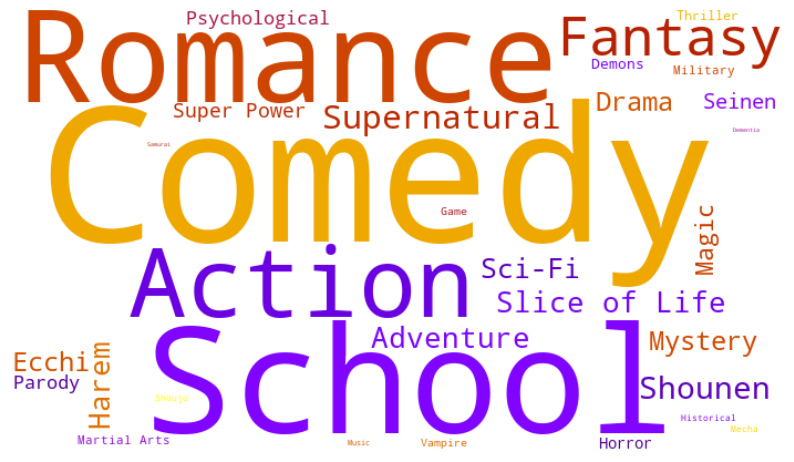

> animes highly rated by this user


,eng_version,Genres
7577,Monogatari Series:Second Season,"Mystery, Comedy, Supernatural, Romance, Vampire"
4970,The Disappearance of Haruhi Suzumiya,"Comedy, Mystery, Romance, School, Sci-Fi, Supernatural"
11260,Mob Psycho 100,"Action, Slice of Life, Comedy, Supernatural"
7449,Attack on Titan,"Action, Military, Mystery, Super Power, Drama, Fantasy, Shounen"
10857,Owarimonogatari,"Mystery, Comedy, Supernatural, Vampire"


In [49]:
user_pref = get_user_preferences(random_user, plot=True, verbose=1)
print('> animes highly rated by this user')

pd.DataFrame(user_pref).head(5)

## **Task 3**: **Recommending** animes for a user

In [50]:
def get_recommended_animes(similar_users, n=10):
    recommended_animes = []
    anime_list = []
    
    for user_id in similar_users.similar_users.values:
        pref_list = get_user_preferences(int(user_id), verbose=0)
        pref_list = pref_list[~ pref_list.eng_version.isin(user_pref.eng_version.values)]
        anime_list.append(pref_list.eng_version.values)
        
    anime_list = pd.DataFrame(anime_list)
    sorted_list = pd.DataFrame(pd.Series(anime_list.values.ravel()).value_counts()).head(n)
    
    for i, anime_name in enumerate(sorted_list.index):        
        n_user_pref = sorted_list[sorted_list.index == anime_name].values[0][0]
        if isinstance(anime_name, str):
            try:
                frame = getAnimeFrame(anime_name)
                anime_id = frame.anime_id.values[0]
                genre = frame.Genres.values[0]
                sypnopsis = getSypnopsis(int(anime_id))
                recommended_animes.append({#"anime_id": anime_id ,
                                            "n": n_user_pref,
                                            "anime_name": anime_name, 
                                            "Genres": genre, 
                                            "sypnopsis": sypnopsis})
            except:
                pass
    
    return pd.DataFrame(recommended_animes)

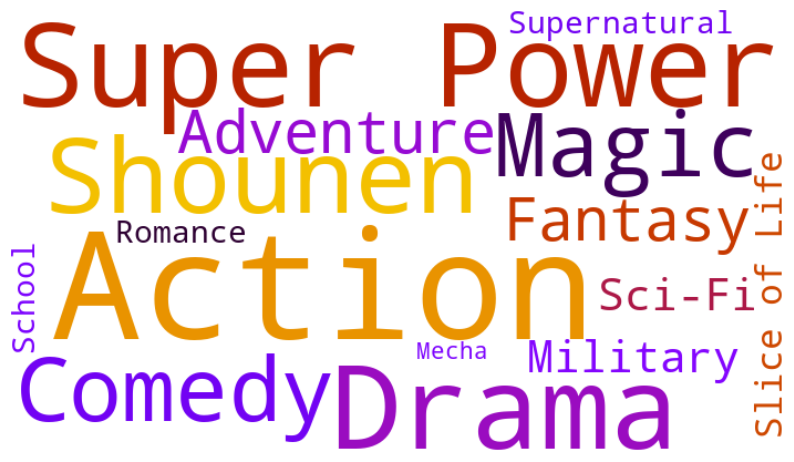


> Top recommendations for user: 102875


,n,anime_name,Genres,sypnopsis
0,6,Hunter x Hunter,"Action, Adventure, Fantasy, Shounen, Super Power","Hunter x Hunter is set in a world where Hunters exist to perform all manner of dangerous tasks like capturing criminals and bravely searching for lost treasures in uncharted territories. Twelve-year-old Gon Freecss is determined to become the best Hunter possible in hopes of finding his father, who was a Hunter himself and had long ago abandoned his young son. However, Gon soon realizes the path to achieving his goals is far more challenging than he could have ever imagined. Along the way to becoming an official Hunter, Gon befriends the lively doctor-in-training Leorio, vengeful Kurapika, and rebellious ex-assassin Killua. To attain their own goals and desires, together the four of them take the Hunter Exam, notorious for its low success rate and high probability of death. Throughout their journey, Gon and his friends embark on an adventure that puts them through many hardships and struggles. They will meet a plethora of monsters, creatures, and characters—all while learning what being a Hunter truly means."
1,5,Fullmetal Alchemist:Brotherhood,"Action, Military, Adventure, Comedy, Drama, Magic, Fantasy, Shounen","""In order for something to be obtained, something of equal value must be lost."" Alchemy is bound by this Law of Equivalent Exchange—something the young brothers Edward and Alphonse Elric only realize after attempting human transmutation: the one forbidden act of alchemy. They pay a terrible price for their transgression—Edward loses his left leg, Alphonse his physical body. It is only by the desperate sacrifice of Edward's right arm that he is able to affix Alphonse's soul to a suit of armor. Devastated and alone, it is the hope that they would both eventually return to their original bodies that gives Edward the inspiration to obtain metal limbs called ""automail"" and become a state alchemist, the Fullmetal Alchemist. Three years of searching later, the brothers seek the Philosopher's Stone, a mythical relic that allows an alchemist to overcome the Law of Equivalent Exchange. Even with military allies Colonel Roy Mustang, Lieutenant Riza Hawkeye, and Lieutenant Colonel Maes Hughes on their side, the brothers find themselves caught up in a nationwide conspiracy that leads them not only to the true nature of the elusive Philosopher's Stone, but their country's murky history as well. In between finding a serial killer and racing against time, Edward and Alphonse must ask themselves if what they are doing will make them human again... or take away their humanity."
2,5,Aldnoah.Zero,"Action, Military, Sci-Fi, Mecha","The discovery of a hypergate on the Moon once allowed the human race to teleport to Mars. Those who chose to settle there unearthed a technology far more advanced than that of their home planet, which they named ""Aldnoah."" This discovery led to the founding of the Vers Empire of Mars and a declaration of war against the ""Terrans,"" those who stayed behind on Earth. However, a battle on the moon—later called ""Heaven's Fall""—caused the hypergate to explode, destroying the moon and leading the two planets to establish an uneasy ceasefire. Their peace was a fragile one, however. Fifteen years later, high school student Inaho Kaizuka witnesses the plotted assassination of the Vers Empire's Princess Asseylum Vers Allusia, who had come to Earth in hopes of repairing the relationship between the empire and its homeland. The ceasefire is shattered, and the Martians declare war on the Terrans once again. In the face of this insurmountable enemy, Inaho and his friends must now fight against the Vers Empire to settle the war once and for all."
3,5,Kanon,"Slice of Life, Supernatural, Drama, Romance","s a young child, Aizawa Yuuichi had often visited his cousin in the city; however, something drastic happened to keep him away for seven long years. Now, Yuuichi returns, his memories of those days are simply gone. S

In [51]:
recommended_animes = get_recommended_animes(similar_users, n=10)
getFavGenre(recommended_animes, plot=True)

print('\n> Top recommendations for user: {}'.format(random_user))
recommended_animes

## **Ranking based Recommendation**

In [52]:
print("Showing recommendations for user: {}".format(random_user))
print("===" * 25)

animes_watched_by_user = rating_df[rating_df.user_id==random_user]
anime_not_watched_df = df[
    ~df["anime_id"].isin(animes_watched_by_user.anime_id.values)
]

anime_not_watched = list(
    set(anime_not_watched_df['anime_id']).intersection(set(anime2anime_encoded.keys()))
)

anime_not_watched = [[anime2anime_encoded.get(x)] for x in anime_not_watched]

user_encoder = user2user_encoded.get(random_user)

user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_watched), anime_not_watched)
)

user_anime_array = [user_anime_array[:, 0], user_anime_array[:, 1]]
ratings = model.predict(user_anime_array).flatten()

top_ratings_indices = (-ratings).argsort()[:10]

recommended_anime_ids = [
    anime_encoded2anime.get(anime_not_watched[x][0]) for x in top_ratings_indices
]

Results = []
top_rated_ids = []

for index, anime_id in enumerate(anime_not_watched):
    rating = ratings[index]
    id_ = anime_encoded2anime.get(anime_id[0])
    
    if id_ in recommended_anime_ids:
        top_rated_ids.append(id_)
        try:
            condition = (df.anime_id == id_)
            name = df[condition]['eng_version'].values[0]
            genre = df[condition].Genres.values[0]
            score = df[condition].Score.values[0]
            sypnopsis = getSypnopsis(int(id_))
        except:
            continue
            
        Results.append({#"anime_id": id_, 
                        "name": name, 
                        "pred_rating": rating,
                        "genre": genre, 
                        'sypnopsis': sypnopsis})

print("---" * 25)
print("> Top 10 anime recommendations")
print("---" * 25)


Results = pd.DataFrame(Results).sort_values(by='pred_rating', ascending=False)
Results

Showing recommendations for user: 102875
535/535 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step
---------------------------------------------------------------------------
> Top 10 anime recommendations
---------------------------------------------------------------------------


,name,pred_rating,genre,sypnopsis
0,Fist of the North Star:The Movie,0.982076,"Sci-Fi, Adventure, Shounen","Following a cataclysmic nuclear war, the world teeters on the brink of complete destruction. Civilization is polarized into a degenerate society where opposing packs of marauding scavengers prey on helpless, homeless nomads. For those who are lucky enough to survive the constant brutality and danger, it is a bleak existence. Life an death blur into abstractions. The only hope left for mankind is to find a hero worthy of becoming the next ""Fist of the North Star"" - an enlightened warrior - who is capable of leading those with the will to survive out of this barrenness into a new world. But in this savage no-man's land of shifting loyalties and power-hungry demi-gods, heroes are in short supply. (Source: AniDB)"
5,Eagle Riders (2),0.955311,"Action, Adventure, Sci-Fi, Shounen","fter Leader X is seemingly destroyed for good at the end of Gatchaman II, a fragment of him that survived grows and mutates into Z. With the head of the Egobossler family, Count Egobossler (and his two subordinates Mechandol and Kempler), Z is bent on destroying the Earth, and the Science Ninja Team, once more. In the wake of Anderson's death, Dr.Nambu has become the new head of the ISO, while the team is now confined to the Gallatown (aka ""G-Town"") underwater base. Engineer Kamo is introduced, and after the New GodPhoenix is destroyed early on, the team receives the new Gatchaspartan as their mecha. The Gatchaspartan has a special mode as well, called Hypershoot, that can only be utilized by Ken (with his new ""Gatchafencer"" sword). As the series progresses, it is learned that the radiation exposure from constant use of the Hypershoot is slowly killing Ken, and that continued use would mean death. Meanwhile, Z plans to destroy the earth with an antimatter asteroid, codenamed ""Poison Apple""."
8,JoJo's Bizarre Adventure:Stardust Crusaders - Battle in Egypt,0.955255,"Action, Adventure, Supernatural, Drama, Shounen","Joutarou Kuujou and his allies have finally made it to Egypt, where the immortal Dio awaits. Upon their arrival, the group gains a new comrade: Iggy, a mutt who wields the Stand ""The Fool."" It's not all good news however, as standing in their path is a new group of Stand users who serve Dio, each with a Stand representative of an ancient Egyptian god. As their final battle approaches, it is a race against time to break Joutarou's mother free from her curse and end Dio's reign of terror over the Joestar family once and for all."
4,Kinnikuman II Sei: Ultimate Muscle 2,0.954121,"Action, Sci-Fi, Comedy, Sports, Martial Arts, Shounen","antaro has made it to the semifinal match of the Chojin Cup. He must now fight Ricardo in a soccer field to advance to the last match. Kevin Mask is also in the semifinals, and must defeat Ilioukhine in an aerial field to advance. These three matches will determine who wins the Chojin Cup. (Source: ANN)"
9,Beyond the Boundary:I'll Be Here - Past Special,0.953069,Music,usic video Yakusoku no Kizuna from Kyoukai no Kanata Movie: I'll Be Here - Kako-hen Blu-ray/DVD.
3,Undersea Super Train:Marine Express,0.951419,"Action, Adventure, Comedy, Sci-Fi, Drama","The year is 2002, and the Marine Express, the first underwater train between America and Japan, is ready for its maiden voyage. The chief engineer suspects that the train's test run will be used for illicit purposes and hires private detective Ban Shunsaku. He arrives to his client's mansion only to find that he has just been murdered. Armed with just a glimpse of the murderer's face, Shunsaku boards the Marine Express to get to the bottom of this mystery. This job, however, is much more than what he bargained for, as the train holds secrets beyond anyone's imagination. (Source: ANN)"
7,Crush Gear Nitro,0.950524,"Cars, Shounen, Sports","Story about a young boy name: Mahha Masaru, who dreamt of having a crush gear fight with the others even though he doesn't

In [63]:
model.save('my_model.keras')

from IPython.display import FileLink
FileLink(r'./anime_model.h5')

/Users/adarsh/Documents/Adarsh/MAC/DataAnalysis/Project/anime_model.h5

In [58]:
predictions = model.predict(X_test_array)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step


In [59]:

# Calculate MAE, MSE, and RMSE on the test set
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)

print("Test MAE:", mae)
print("Test MSE:", mse)
print("Test RMSE:", rmse)

Test MAE: 0.192487547361991
Test MSE: 0.07481163021336382
Test RMSE: 0.2735171479329291
